# Density-Based Spatial Clustering Of Applications With Noise (DBSCAN)

### Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

# Parameters Required For DBSCAN Algorithm
## `eps:` 
#### It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors. If the eps value is chosen too small then a large part of the data will be considered as an outlier. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.
## `MinPts:`
#### Minimum number of neighbors (data points) within eps radius. The larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

## In this algorithm, we have 3 types of data points.
### `Core Point:` A point is a core point if it has more than MinPts points within eps. 
### `Border Point:` A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 
### `Noise or outlier:` A point which is not a core point or border point.

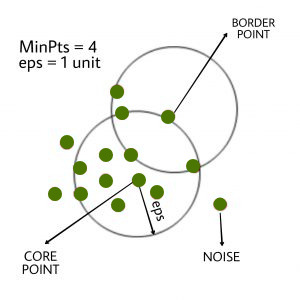

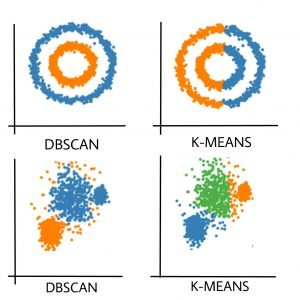

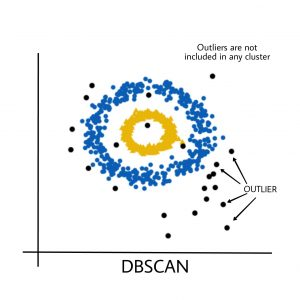

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [4]:
# Creating data points in the form of a circle
df = pd.DataFrame(PointsInCircum(500, 1000))
df = pd.concat([df, pd.DataFrame(PointsInCircum(300, 700))])
df = pd.concat([df, pd.DataFrame(PointsInCircum(100, 300))])

# Adding noise to the dataset
# Assuming you have some code here to add noise

print(df)

              0          1
0    449.734782 -31.193988
1    446.187924 -32.955826
2    413.102736 -14.176969
3    469.878259 -41.947611
4    489.530650  13.832484
..          ...        ...
295   85.782332 -29.176100
296   39.853470 -20.715261
297   95.818130 -29.043486
298  104.557511 -68.616356
299   84.038513 -65.108421

[2000 rows x 2 columns]


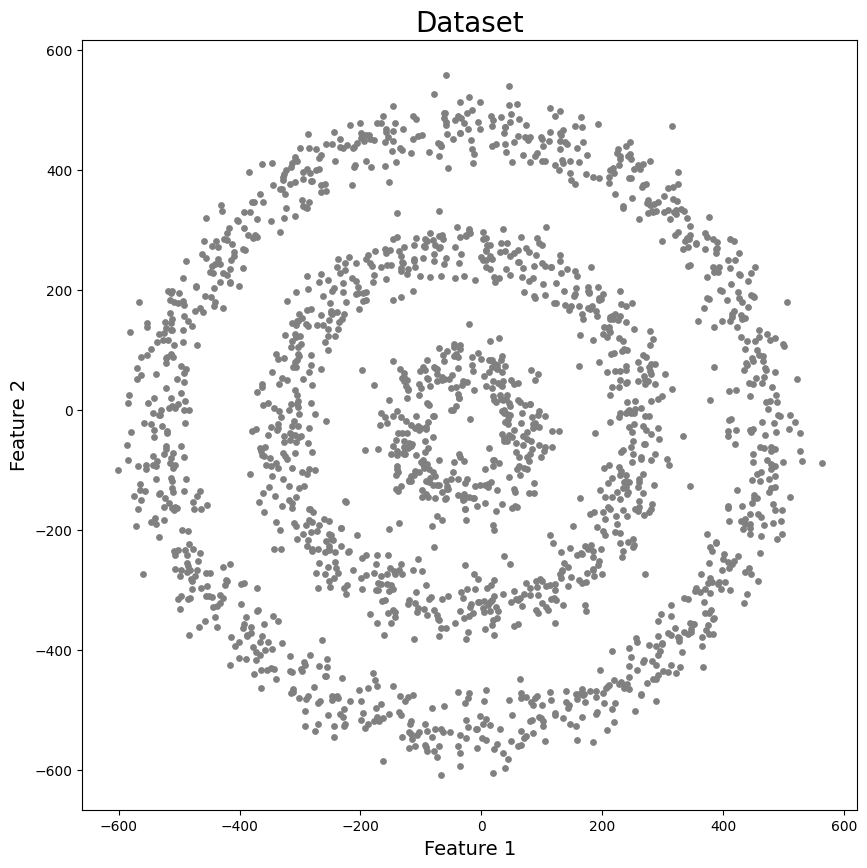

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# K-Means vs. Hierarchical vs. DBSCAN Clustering

In [6]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

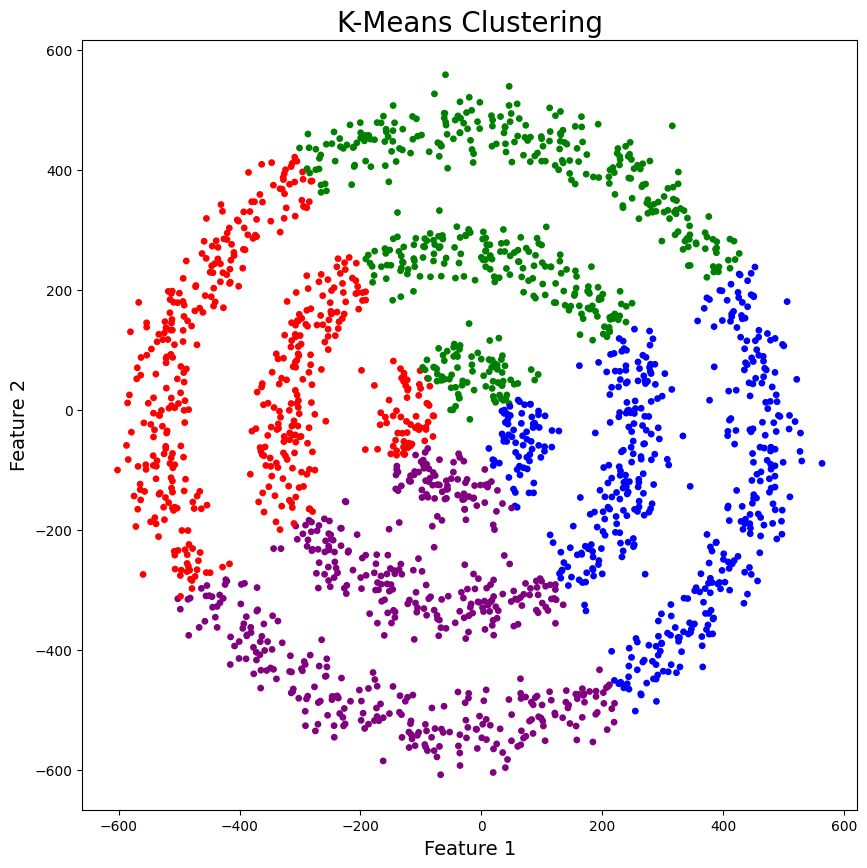

In [7]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, metric='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

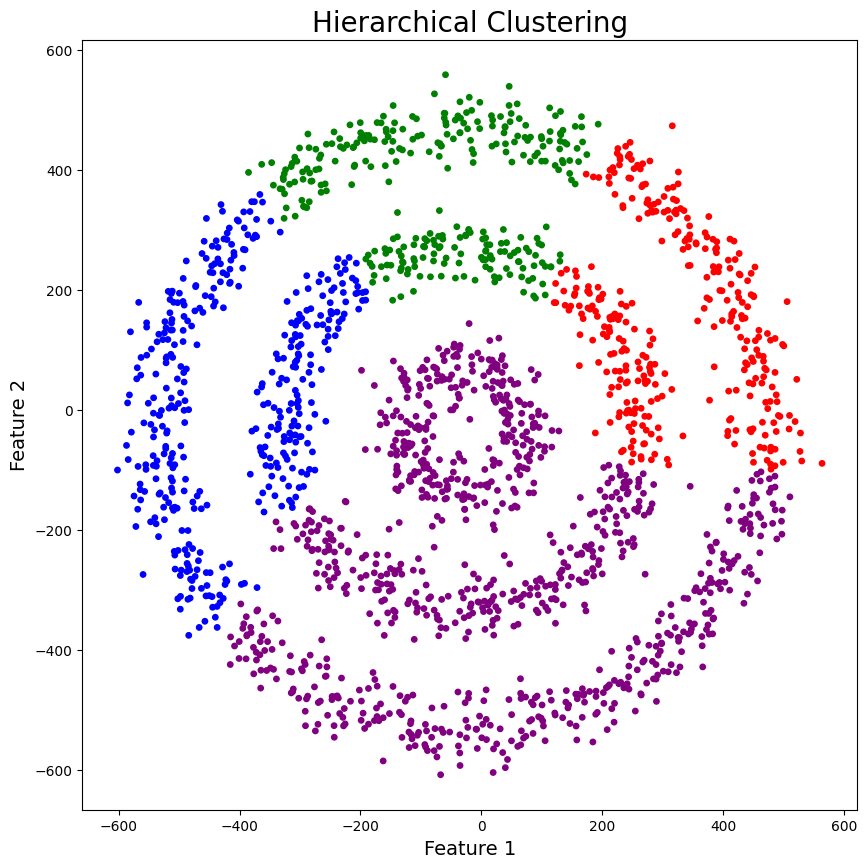

In [9]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## DBSCAN Clustering

In [11]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

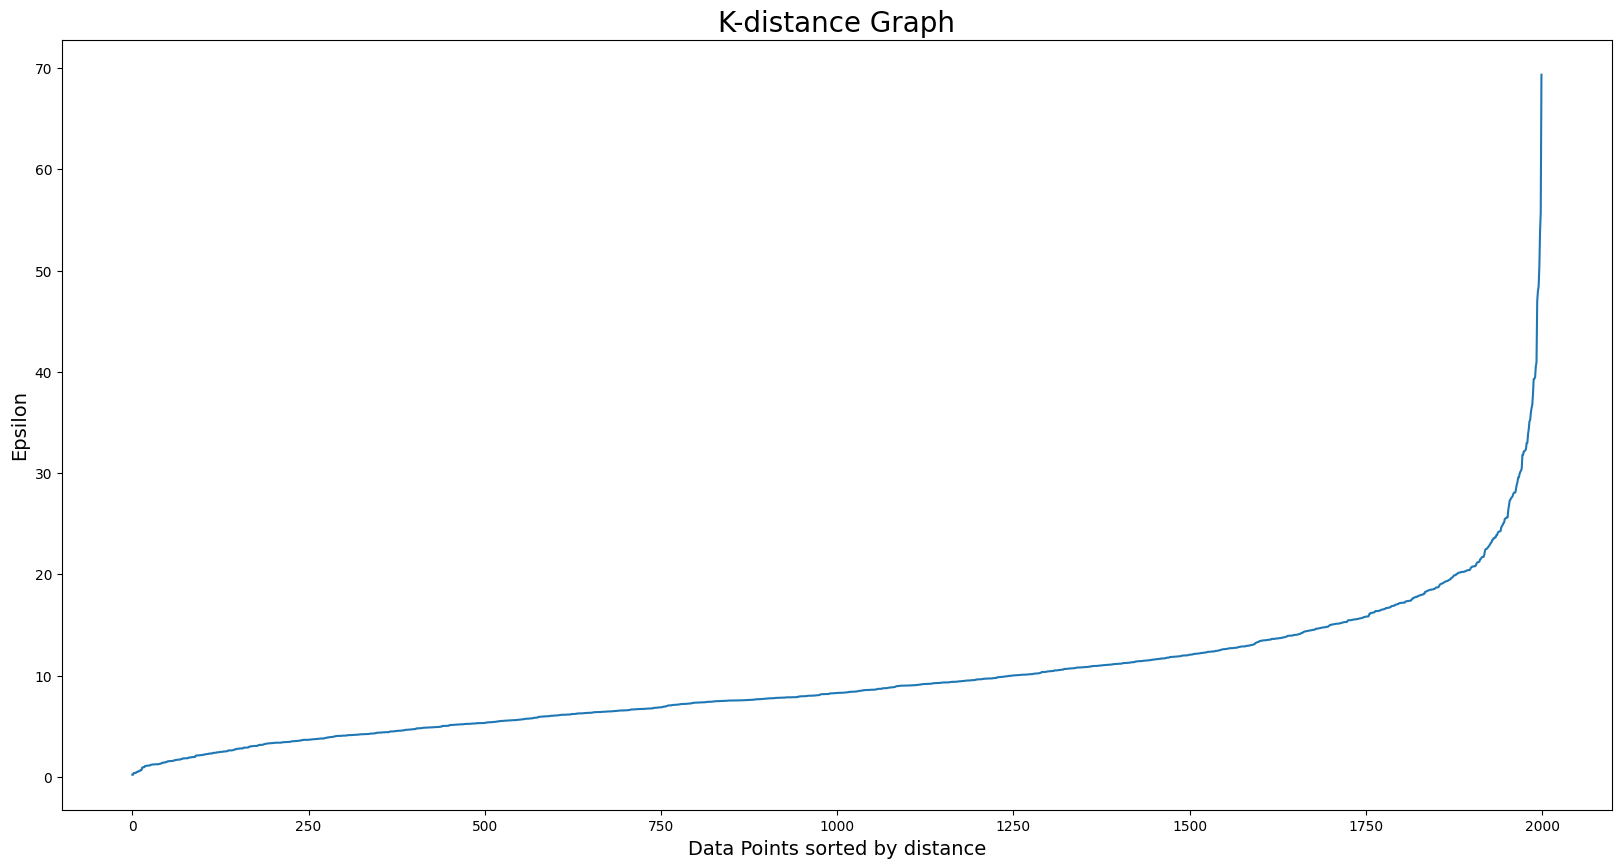

In [12]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [13]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [14]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 6    670
 0    318
 4    309
 7    286
 2    179
-1     96
 1     87
 3     51
 5      4
Name: count, dtype: int64

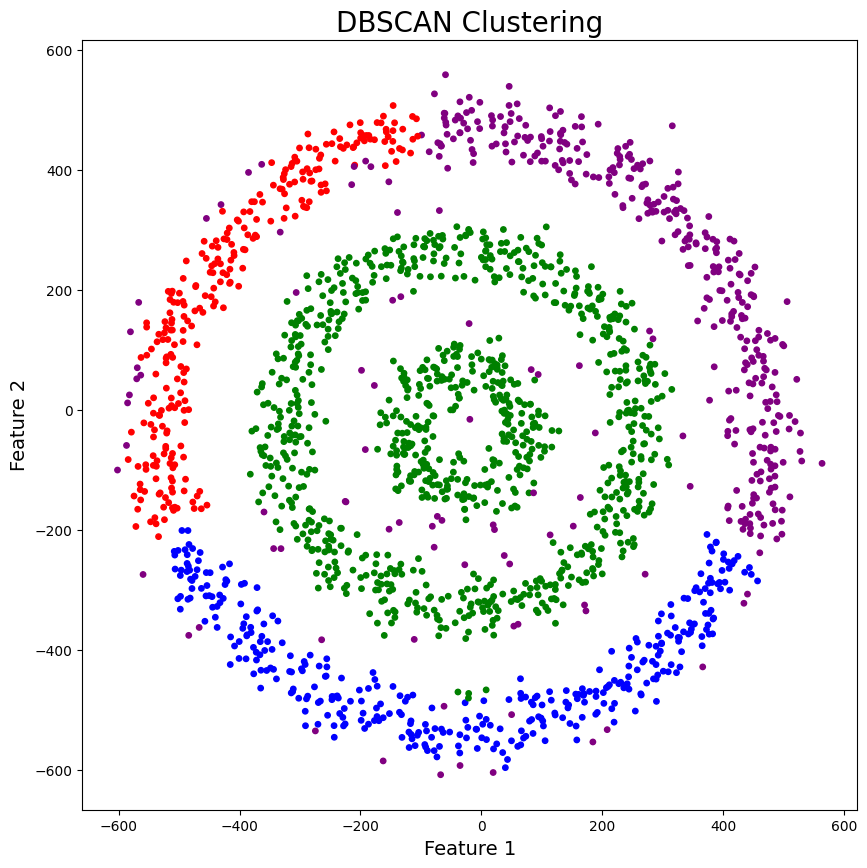

In [15]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Implementation Of DBSCAN Algorithm Using Machine Learning In Python 

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [17]:
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
					cluster_std=0.50, random_state=0)


['y', 'b', 'g', 'r']


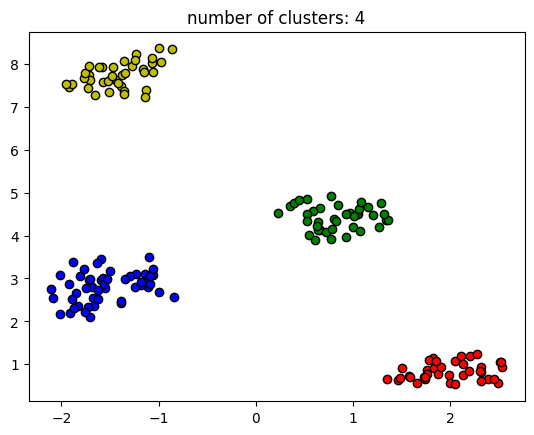

In [18]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


In [20]:
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score

In [21]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)


Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31
